In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic'
)
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({"font.size" : 10, 
                     "font.family" : 'NanumGothic',
                     "axes.unicode_minus" : False})
plt.rc("font", family = 'NanumGothic')
import seaborn as sns
from pathlib import Path

In [2]:
DATA = Path("../../data")

In [3]:
train = pd.read_csv(DATA / "train_final_preprocess.csv")
test = pd.read_csv(DATA / "test_final_preprocess.csv")

In [4]:
train = train.sort_values(by=["stn_id", "DateTime"]).reset_index(drop=True)

In [5]:
train

,class,day,hm,minute,month,re,stn_id,sun10,ta,time,...,cos_time,sin_month,cos_month,alpha,dew_point,diff_air-dew,diff_ts-dew,fog_risk,sin_deg,cos_deg
0,4,1,38.9,10,1,0,AA,0.0,-6.4,0,...,1.000000,5.000000e-01,0.866025,-1.422032,-18.083476,11.683476,15.283476,0,0.000000,1.000000
1,4,1,37.9,20,1,0,AA,0.0,-6.3,0,...,1.000000,5.000000e-01,0.866025,-1.440405,-18.299136,11.999136,15.599136,0,0.000000,1.000000
2,4,1,40.0,30,1,0,AA,0.0,-6.3,0,...,1.000000,5.000000e-01,0.866025,-1.386477,-17.664937,11.364937,15.064937,0,0.000000,1.000000
3,4,1,39.5,40,1,0,AA,0.0,-6.2,0,...,1.000000,5.000000e-01,0.866025,-1.391392,-17.722897,11.522897,15.122897,0,0.466387,0.884581
4,4,1,39.8,50,1,0,AA,0.0,-6.1,0,...,1.000000,5.000000e-01,0.866025,-1.376169,-17.543307,11.443307,15.043307,0,0.863396,0.504528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156455,4,31,50.2,10,12,0,EC,0.0,2.5,23,...,0.965926,-2.449294e-16,1.000000,-0.509409,-6.810493,9.310493,5.910493,0,-0.816138,0.577858
3156456,4,31,50.1,20,12,0,EC,0.0,2.3,23,...,0.965926,-2.449294e-16,1.000000,-0.525645,-7.021146,9.321146,5.721146,0,-0.914960,0.403545
3156457,4,31,51.0,30,12,0,EC,0.0,2.2,23,...,0.965926,-2.449294e-16,1.000000,-0.514970,-6.882689,9.082689,5.482689,0,-0.997314,0.073238
3156458,4,31,51.7,40,12,0,EC,0.0,2.1,23,...,0.965926,-2.449294e-16,1.000000,-0.508474,-6.798347,8.898347,5.198347,0,-0.999986,0.005236


In [6]:
test

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,...,cos_time,sin_month,cos_month,alpha,dew_point,diff_air-dew,diff_ts-dew,fog_risk,sin_deg,cos_deg
0,L,1,1,0,0,AI,329.5,0.6,-2.5,0,...,1.000000,5.000000e-01,0.866025,-0.317099,-4.285774,1.785774,2.685774,0,-0.507538,0.861629
1,L,1,1,0,10,AI,321.8,1.2,-2.5,0,...,1.000000,5.000000e-01,0.866025,-0.309130,-4.179973,1.679973,2.579973,0,-0.618408,0.785857
2,L,1,1,0,20,AI,0.4,0.4,-2.5,0,...,1.000000,5.000000e-01,0.866025,-0.304606,-4.119849,1.619849,2.419849,0,0.006981,0.999976
3,L,1,1,0,30,AI,323.6,0.7,-2.6,0,...,1.000000,5.000000e-01,0.866025,-0.310901,-4.203496,1.603496,2.603496,0,-0.593419,0.804894
4,L,1,1,0,40,AI,208.4,0.2,-2.6,0,...,1.000000,5.000000e-01,0.866025,-0.307525,-4.158644,1.558644,2.558644,0,-0.475624,-0.879649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262795,L,12,31,23,10,ED,338.8,6.1,4.5,0,...,0.965926,-2.449294e-16,1.000000,-0.017403,-0.239285,4.739285,2.139285,0,-0.361625,0.932324
262796,L,12,31,23,20,ED,335.2,5.8,4.6,0,...,0.965926,-2.449294e-16,1.000000,-0.009006,-0.123892,4.723892,2.023892,0,-0.419452,0.907777
262797,L,12,31,23,30,ED,337.1,5.3,4.5,0,...,0.965926,-2.449294e-16,1.000000,-0.006245,-0.085923,4.585923,1.885923,0,-0.389124,0.921185
262798,L,12,31,23,40,ED,322.0,3.7,4.3,0,...,0.965926,-2.449294e-16,1.000000,-0.014720,-0.202430,4.502430,1.602430,0,-0.615661,0.788011


In [7]:
train_use_label_x = ["year", 'hm', 'sun10', 'ta', 'ts', 'ws10_ms', 'dew_point', 'diff_air-dew', 'diff_ts-dew', 
                     'sin_time', 'cos_time', 'sin_month', 'cos_month', 'sin_deg', 'cos_deg','ground', 're', 'fog_risk', 'class']
test_use_label_x = ['hm', 'sun10', 'ta', 'ts', 'ws10_ms', 'dew_point', 'diff_air-dew', 'diff_ts-dew', 
                     'sin_time', 'cos_time', 'sin_month', 'cos_month', 'sin_deg', 'cos_deg','ground', 're', 'fog_risk', 'class']

In [9]:
train_df = train.loc[train["ground"]=="A", train_use_label_x]
test_df = test.loc[test["ground"]=="A", test_use_label_x]

In [10]:
train_df

,year,hm,sun10,ta,ts,ws10_ms,dew_point,diff_air-dew,diff_ts-dew,sin_time,cos_time,sin_month,cos_month,sin_deg,cos_deg,ground,re,fog_risk,class
0,I,38.9,0.0,-6.4,-2.8,0.0,-18.083476,11.683476,15.283476,0.000000,1.000000,5.000000e-01,0.866025,0.000000,1.000000,A,0,0,4
1,I,37.9,0.0,-6.3,-2.7,0.0,-18.299136,11.999136,15.599136,0.000000,1.000000,5.000000e-01,0.866025,0.000000,1.000000,A,0,0,4
2,I,40.0,0.0,-6.3,-2.6,0.0,-17.664937,11.364937,15.064937,0.000000,1.000000,5.000000e-01,0.866025,0.000000,1.000000,A,0,0,4
3,I,39.5,0.0,-6.2,-2.6,0.4,-17.722897,11.522897,15.122897,0.000000,1.000000,5.000000e-01,0.866025,0.466387,0.884581,A,0,0,4
4,I,39.8,0.0,-6.1,-2.5,0.5,-17.543307,11.443307,15.043307,0.000000,1.000000,5.000000e-01,0.866025,0.863396,0.504528,A,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262579,K,77.8,0.0,-2.1,-0.7,0.0,-5.446110,3.346110,4.746110,-0.258819,0.965926,-2.449294e-16,1.000000,0.000000,1.000000,A,0,0,4
1262580,K,78.0,0.0,-2.0,-0.9,0.0,-5.315162,3.315162,4.415162,-0.258819,0.965926,-2.449294e-16,1.000000,0.000000,1.000000,A,0,0,4
1262581,K,78.4,0.0,-2.0,-0.9,0.0,-5.247853,3.247853,4.347853,-0.258819,0.965926,-2.449294e-16,1.000000,0.000000,1.000000,A,0,0,4
1262582,K,78.3,0.0,-2.0,-0.9,0.0,-5.264651,3.264651,4.364651,-0.258819,0.965926,-2.449294e-16,1.000000,0.000000,1.000000,A,0,0,4


In [11]:
test_df

,hm,sun10,ta,ts,ws10_ms,dew_point,diff_air-dew,diff_ts-dew,sin_time,cos_time,sin_month,cos_month,sin_deg,cos_deg,ground,re,fog_risk,class
0,87.5,0.0,-2.5,-1.6,0.6,-4.285774,1.785774,2.685774,0.000000,1.000000,5.000000e-01,0.866025,-0.507538,0.861629,A,0,0,NaN
1,88.2,0.0,-2.5,-1.6,1.2,-4.179973,1.679973,2.579973,0.000000,1.000000,5.000000e-01,0.866025,-0.618408,0.785857,A,0,0,NaN
2,88.6,0.0,-2.5,-1.7,0.4,-4.119849,1.619849,2.419849,0.000000,1.000000,5.000000e-01,0.866025,0.006981,0.999976,A,0,0,NaN
3,88.7,0.0,-2.6,-1.6,0.7,-4.203496,1.603496,2.603496,0.000000,1.000000,5.000000e-01,0.866025,-0.593419,0.804894,A,0,0,NaN
4,89.0,0.0,-2.6,-1.6,0.2,-4.158644,1.558644,2.558644,0.000000,1.000000,5.000000e-01,0.866025,-0.475624,-0.879649,A,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,96.6,0.0,1.0,-0.1,0.3,0.520841,0.479159,-0.620841,-0.258819,0.965926,-2.449294e-16,1.000000,0.621148,-0.783693,A,0,3,NaN
52556,96.3,0.0,0.9,-0.1,0.0,0.378287,0.521713,-0.478287,-0.258819,0.965926,-2.449294e-16,1.000000,0.782608,-0.622515,A,0,3,NaN
52557,96.3,0.0,0.8,-0.1,0.1,0.278724,0.521276,-0.378724,-0.258819,0.965926,-2.449294e-16,1.000000,-0.873772,0.486335,A,0,3,NaN
52558,96.2,0.0,0.8,-0.1,1.2,0.264391,0.535609,-0.364391,-0.258819,0.965926,-2.449294e-16,1.000000,-0.965473,0.260505,A,0,3,NaN


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

In [13]:
# min-max scaler
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
X_cols = ['hm', 'sun10', 'ta', 'ts', 'ws10_ms', 'dew_point', 'diff_air-dew', 'diff_ts-dew']
train_df.loc[:, X_cols] = X_scaler.fit_transform(train_df[X_cols])
test_df.loc[:, X_cols] = X_scaler.transform(test_df[X_cols])

In [16]:
# label incodding

# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# train_df["ground"] = label_encoder.fit_transform(train_df["ground"])
# test_df["ground"] = label_encoder.transform(test["ground"])

In [17]:
train_df

,year,hm,sun10,ta,ts,ws10_ms,dew_point,diff_air-dew,diff_ts-dew,sin_time,cos_time,sin_month,cos_month,sin_deg,cos_deg,ground,re,fog_risk,class
0,I,0.367495,0.0,0.260943,0.029453,0.000000,0.198926,0.271094,0.460359,0.000000,1.000000,5.000000e-01,0.866025,0.000000,1.000000,0,0,0,4
1,I,0.357143,0.0,0.262626,0.030856,0.000000,0.195481,0.278418,0.463774,0.000000,1.000000,5.000000e-01,0.866025,0.000000,1.000000,0,0,0,4
2,I,0.378882,0.0,0.262626,0.032258,0.000000,0.205613,0.263703,0.457995,0.000000,1.000000,5.000000e-01,0.866025,0.000000,1.000000,0,0,0,4
3,I,0.373706,0.0,0.264310,0.032258,0.035398,0.204687,0.267368,0.458622,0.000000,1.000000,5.000000e-01,0.866025,0.466387,0.884581,0,0,0,4
4,I,0.376812,0.0,0.265993,0.033661,0.044248,0.207556,0.265521,0.457761,0.000000,1.000000,5.000000e-01,0.866025,0.863396,0.504528,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262579,K,0.770186,0.0,0.333333,0.058906,0.000000,0.400827,0.077640,0.346365,-0.258819,0.965926,-2.449294e-16,1.000000,0.000000,1.000000,0,0,0,4
1262580,K,0.772257,0.0,0.335017,0.056101,0.000000,0.402919,0.076922,0.342785,-0.258819,0.965926,-2.449294e-16,1.000000,0.000000,1.000000,0,0,0,4
1262581,K,0.776398,0.0,0.335017,0.056101,0.000000,0.403994,0.075360,0.342057,-0.258819,0.965926,-2.449294e-16,1.000000,0.000000,1.000000,0,0,0,4
1262582,K,0.775362,0.0,0.335017,0.056101,0.000000,0.403726,0.075750,0.342239,-0.258819,0.965926,-2.449294e-16,1.000000,0.000000,1.000000,0,0,0,4


In [18]:
test_df

,hm,sun10,ta,ts,ws10_ms,dew_point,diff_air-dew,diff_ts-dew,sin_time,cos_time,sin_month,cos_month,sin_deg,cos_deg,ground,re,fog_risk,class
0,0.870600,0.0,0.326599,0.046283,0.053097,0.419365,0.041436,0.324076,0.000000,1.000000,5.000000e-01,0.866025,-0.507538,0.861629,A,0,0,NaN
1,0.877847,0.0,0.326599,0.046283,0.106195,0.421055,0.038981,0.322932,0.000000,1.000000,5.000000e-01,0.866025,-0.618408,0.785857,A,0,0,NaN
2,0.881988,0.0,0.326599,0.044881,0.035398,0.422015,0.037586,0.321200,0.000000,1.000000,5.000000e-01,0.866025,0.006981,0.999976,A,0,0,NaN
3,0.883023,0.0,0.324916,0.046283,0.061947,0.420679,0.037206,0.323186,0.000000,1.000000,5.000000e-01,0.866025,-0.593419,0.804894,A,0,0,NaN
4,0.886128,0.0,0.324916,0.046283,0.017699,0.421396,0.036165,0.322701,0.000000,1.000000,5.000000e-01,0.866025,-0.475624,-0.879649,A,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,0.964803,0.0,0.385522,0.067321,0.026549,0.496157,0.011118,0.288305,-0.258819,0.965926,-2.449294e-16,1.000000,0.621148,-0.783693,A,0,3,NaN
52556,0.961698,0.0,0.383838,0.067321,0.000000,0.493880,0.012105,0.289847,-0.258819,0.965926,-2.449294e-16,1.000000,0.782608,-0.622515,A,0,3,NaN
52557,0.961698,0.0,0.382155,0.067321,0.008850,0.492289,0.012095,0.290924,-0.258819,0.965926,-2.449294e-16,1.000000,-0.873772,0.486335,A,0,3,NaN
52558,0.960663,0.0,0.382155,0.067321,0.106195,0.492060,0.012428,0.291079,-0.258819,0.965926,-2.449294e-16,1.000000,-0.965473,0.260505,A,0,3,NaN


In [34]:
train_df = train_df.loc[:, ('year', 'hm', 'sun10', 'ta', 'ts', 'ws10_ms', 'dew_point', 'diff_air-dew', 'diff_ts-dew', 
                     'sin_time', 'cos_time', 'sin_month', 'cos_month', 'sin_deg', 'cos_deg', 're', 'fog_risk', 'class')]
test_df = test_df.loc[:, ('hm', 'sun10', 'ta', 'ts', 'ws10_ms', 'dew_point', 'diff_air-dew', 'diff_ts-dew', 
                     'sin_time', 'cos_time', 'sin_month', 'cos_month', 'sin_deg', 'cos_deg', 're', 'fog_risk', 'class')]

In [35]:
# Holdout (I,J : K)

train_data = train_df.query("year!='K'").iloc[:, 1:]
valid_data = train_df.query("year=='K'").iloc[:, 1:]

In [36]:
train_data

,hm,sun10,ta,ts,ws10_ms,dew_point,diff_air-dew,diff_ts-dew,sin_time,cos_time,sin_month,cos_month,sin_deg,cos_deg,re,fog_risk,class
0,0.367495,0.0,0.260943,0.029453,0.000000,0.198926,0.271094,0.460359,0.000000,1.000000,5.000000e-01,0.866025,0.000000,1.000000,0,0,4
1,0.357143,0.0,0.262626,0.030856,0.000000,0.195481,0.278418,0.463774,0.000000,1.000000,5.000000e-01,0.866025,0.000000,1.000000,0,0,4
2,0.378882,0.0,0.262626,0.032258,0.000000,0.205613,0.263703,0.457995,0.000000,1.000000,5.000000e-01,0.866025,0.000000,1.000000,0,0,4
3,0.373706,0.0,0.264310,0.032258,0.035398,0.204687,0.267368,0.458622,0.000000,1.000000,5.000000e-01,0.866025,0.466387,0.884581,0,0,4
4,0.376812,0.0,0.265993,0.033661,0.044248,0.207556,0.265521,0.457761,0.000000,1.000000,5.000000e-01,0.866025,0.863396,0.504528,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210019,0.367495,0.0,0.272727,0.009818,0.044248,0.209007,0.272695,0.438388,-0.258819,0.965926,-2.449294e-16,1.000000,-0.934204,0.356738,0,0,4
1210020,0.398551,0.0,0.271044,0.009818,0.053097,0.221637,0.252032,0.429836,-0.258819,0.965926,-2.449294e-16,1.000000,-0.935444,-0.353475,0,0,4
1210021,0.435818,0.0,0.267677,0.007013,0.061947,0.234451,0.228781,0.418995,-0.258819,0.965926,-2.449294e-16,1.000000,-0.842452,-0.538771,0,0,4
1210022,0.445135,0.0,0.264310,0.007013,0.061947,0.235271,0.222949,0.418440,-0.258819,0.965926,-2.449294e-16,1.000000,-0.384295,-0.923210,0,0,4


In [37]:
valid_data

,hm,sun10,ta,ts,ws10_ms,dew_point,diff_air-dew,diff_ts-dew,sin_time,cos_time,sin_month,cos_month,sin_deg,cos_deg,re,fog_risk,class
105263,0.390269,0.0,0.225589,0.120337,0.168142,0.178844,0.251532,0.544058,0.000000,1.000000,5.000000e-01,0.866025,-0.675590,0.737277,0,0,4
105264,0.387164,0.0,0.223906,0.082188,0.168142,0.176036,0.253290,0.516534,0.000000,1.000000,5.000000e-01,0.866025,-0.825113,0.564967,0,0,4
105265,0.387164,0.0,0.222222,0.087798,0.194690,0.174587,0.253074,0.521843,0.000000,1.000000,5.000000e-01,0.866025,-0.998441,0.055822,0,0,4
105266,0.394410,0.0,0.218855,0.123983,0.185841,0.174836,0.248073,0.549585,0.000000,1.000000,5.000000e-01,0.866025,-0.992115,-0.125333,0,0,4
105267,0.392340,0.0,0.217172,0.130996,0.203540,0.172491,0.249159,0.556582,0.000000,1.000000,5.000000e-01,0.866025,-0.975917,-0.218143,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262579,0.770186,0.0,0.333333,0.058906,0.000000,0.400827,0.077640,0.346365,-0.258819,0.965926,-2.449294e-16,1.000000,0.000000,1.000000,0,0,4
1262580,0.772257,0.0,0.335017,0.056101,0.000000,0.402919,0.076922,0.342785,-0.258819,0.965926,-2.449294e-16,1.000000,0.000000,1.000000,0,0,4
1262581,0.776398,0.0,0.335017,0.056101,0.000000,0.403994,0.075360,0.342057,-0.258819,0.965926,-2.449294e-16,1.000000,0.000000,1.000000,0,0,4
1262582,0.775362,0.0,0.335017,0.056101,0.000000,0.403726,0.075750,0.342239,-0.258819,0.965926,-2.449294e-16,1.000000,0.000000,1.000000,0,0,4


In [38]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"{device} is available")

cpu is available


In [39]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data, window_size=1, kind: str = None):
        self.data = np.array(data)
        self.window_size = window_size
        self.kind = kind
        
    def __len__(self):
        return len(self.data) - self.window_size # 2105254
    
    def __getitem__(self, idx):
        if self.kind == 'test':
            X_data = self.data[idx:idx+self.window_size, :]
            return torch.tensor(data=X_data, dtype=torch.float32)
        elif self.kind == 'train' or self.kind == 'valid':
            X_data = self.data[idx:idx+self.window_size, :-1]
            y_data = self.data[idx+self.window_size, -1]
            return torch.tensor(data=X_data, dtype=torch.float32), torch.tensor(data=y_data, dtype=torch.float32)
        else:
            raise

In [40]:
batch_size = 6 * 24 # 배치 사이즈는 하루 단위로 설정
window_size = 6 # 60분을 보고 다음 10분을 예측하므로 총 window_size는 6

In [41]:
pre_val_data = valid_data.iloc[:window_size, :].reset_index(drop=True)
valid_data = pd.concat([pre_val_data, valid_data.reset_index(drop=True)], axis=0).reset_index(drop=True)

In [42]:
train_dataset = CustomDataset(data=train_data, window_size=window_size, kind='train') # window_size는 default 1
valid_dataset = CustomDataset(data=valid_data, window_size=window_size, kind='valid')

In [43]:
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, drop_last=True) # 시계열 데이터라서 shuffle은 함부로 하면 안됨
valid_data_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, drop_last=True) # 시계열 데이터라서 shuffle은 함부로 하면 안됨

In [44]:
for X, y in train_data_loader:
    print(X.shape, y.shape)
    break
# (batch size, time step, feature dimension) 

torch.Size([144, 6, 16]) torch.Size([144])


In [45]:
for X, y in valid_data_loader:
    print(X.shape, y.shape)
    break
# (batch size, time step, feature dimension) 

torch.Size([144, 6, 16]) torch.Size([144])


In [52]:
# 모델링 파라미터 정의
input_size = len(train_data.columns) - 1 # 입력 특성 개수(target columns 만큼 특성이 들어감)
num_layers = 4 # Hidden Layer의 개수
hidden_size = 256 # Hidden Layer의 크기 train 데이터의 개수가 대략 2백만개 정도이므로 256 정도로 세팅 (크면 모델의 표현력이 상승하지만 과적합의 위험이 존재함 -> 모델의 복잡성과 데이터의 복잡성을 고려해야함 = 실험적으로 찾아야함)
output_size = 4 # classification 이므로 각 클래스의 확률값 반환

In [53]:
# 모델링
from torch.autograd import Variable

"""LSTM"""

class FogLSTMClassification(nn.Module):
    def __init__(self, input_size, num_layers, hidden_size, window_size, device):
        super(FogLSTMClassification, self).__init__()
        self.device = device
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.window_size = window_size
        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            dropout=0.8,
                            batch_first=True)
        self.fc = nn.Sequential(nn.Linear(hidden_size, 16),
                                nn.ReLU(),
                                nn.Linear(16, 7),
                                nn.ReLU(),
                                nn.Linear(7, output_size))
        self.batch_norm = nn.BatchNorm1d(hidden_size)
        
    def forward(self, x):
        
        # initalization
        h0 = Variable(torch.zeros(self.num_layers, x.size()[0], self.hidden_size).to(device=device))
        c0 = Variable(torch.zeros(self.num_layers, x.size()[0], self.hidden_size).to(device=device))
        
        out, _ = self.lstm(x, (h0, c0))
        out = out.contiguous().view(-1, self.hidden_size) # [batch_size*sequence_length, hidden_size]
        out = self.batch_norm(out) # 배치 정규화
        out = out.view(-1, self.window_size, self.hidden_size) # [batch_size, sequence_length, hidden_size]
        
        # out = out.reshape(out.shape[0], -1)
        out = self.fc(out[:, -1, :])
        
        return out

In [54]:
model = FogLSTMClassification(input_size=input_size,
                   hidden_size=hidden_size,
                   window_size=window_size,
                   num_layers=num_layers,
                   device=device).to(device=device)

In [55]:
# 클래스 가중치 계산
train_y = train["class"]
class_counts = np.bincount(train_y)[1:] # 라벨이 1부터 시작함
total_samples = len(train_y)
class_weights = [total_samples / class_counts[i] for i in range(len(class_counts))]
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32, device=device)

In [56]:
# 학습 파라미터 정의

criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
learning_rate = 0.001 # 학습률은 0.001로 설정
epoch = 10 # 학습 반복 횟수
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

In [57]:
# 학습
from tqdm.auto import tqdm
import torch.nn.utils as utils

train_loss_list = []
valid_loss_list = []
epoch_data_list = []
train_n = len(train_data_loader)
valid_n = len(valid_data_loader)
actual_label = valid_data.iloc[:, -1]

for e in tqdm(range(1, epoch+1)):
    train_running_loss = 0.0
    valid_running_loss = 0.0
    train_iterator = tqdm(enumerate(train_data_loader), total=train_n, desc=f"training epoch {e}")
    valid_iterator = tqdm(enumerate(valid_data_loader), total=valid_n, desc=f"validation epoch {e}")
    pred_label = []
    
    # training
    model.train()
    for _, batch_data in train_iterator:
        X, y = batch_data # 배치데이터
        y = y.long() - 1
        out = model(X) # 학습 데이터를 모델에 넣기
        # pred_label = torch.argmax(out, dim=1)
        loss = criterion(out, y) # output과 y 데이터로 loss 구하기
        
        optimizer.zero_grad() # 기울기 초기화
        loss.backward() # 역전파 수행 -> loss function의 기울기 계산
        
        optimizer.step() # 기울기를 이용해 가중치 업데이트
        train_running_loss += loss.item() # 한 배치의 loss 더하기 (추후 평균 loss를 구하기 위함)
        train_iterator.set_postfix({
            'train_loss' : format(loss, 'f')
        })
    
    train_loss_list.append(train_running_loss / train_n) # 한 epoch의 평균 loss
    
    # validation
    model.eval()
    with torch.no_grad():
        for _, batch_data in valid_iterator:
            X, y = batch_data
            y = y.long() - 1
            out = model(X)
            loss = criterion(out, y)
            pred_label.append(torch.argmax(out, dim=1) + 1) # label이 1부터 시작
        
            valid_running_loss += loss.item()
            valid_iterator.set_postfix({
                'valid_loss' : format(loss, 'f')
            })
            
        pred_label = np.array(pred_label, dtype='object').flatten()
        valid_loss_list.append(valid_running_loss / valid_n)
        scheduler.step(valid_running_loss / valid_n)
        epoch_data_list.append(pd.DataFrame({
            "actual" : actual_label[window_size:].reset_index(drop=True),
            "pred" : pred_label
        }))

  0%|          | 0/10 [00:00<?, ?it/s]

training epoch 1:   0%|          | 0/5847 [00:00<?, ?it/s]

validation epoch 1:   0%|          | 0/2920 [00:00<?, ?it/s]

training epoch 2:   0%|          | 0/5847 [00:00<?, ?it/s]

validation epoch 2:   0%|          | 0/2920 [00:00<?, ?it/s]

training epoch 3:   0%|          | 0/5847 [00:00<?, ?it/s]

validation epoch 3:   0%|          | 0/2920 [00:00<?, ?it/s]

training epoch 4:   0%|          | 0/5847 [00:00<?, ?it/s]

validation epoch 4:   0%|          | 0/2920 [00:00<?, ?it/s]

training epoch 5:   0%|          | 0/5847 [00:00<?, ?it/s]

validation epoch 5:   0%|          | 0/2920 [00:00<?, ?it/s]

training epoch 6:   0%|          | 0/5847 [00:00<?, ?it/s]

validation epoch 6:   0%|          | 0/2920 [00:00<?, ?it/s]

training epoch 7:   0%|          | 0/5847 [00:00<?, ?it/s]

validation epoch 7:   0%|          | 0/2920 [00:00<?, ?it/s]

training epoch 8:   0%|          | 0/5847 [00:00<?, ?it/s]

validation epoch 8:   0%|          | 0/2920 [00:00<?, ?it/s]

training epoch 9:   0%|          | 0/5847 [00:00<?, ?it/s]

validation epoch 9:   0%|          | 0/2920 [00:00<?, ?it/s]

training epoch 10:   0%|          | 0/5847 [00:00<?, ?it/s]

validation epoch 10:   0%|          | 0/2920 [00:00<?, ?it/s]

In [35]:
train_loss_list

[0.4100408837813097,
 0.3890680175681967,
 0.38852877866544705,
 0.3900637671472825,
 0.3874995369482299,
 0.38340193180672216,
 0.38147376126233506,
 0.38278108029302554,
 0.386739196123071,
 0.3831394827563836]

In [36]:
valid_loss_list

[0.5932160076933389,
 0.4325133186377177,
 0.4406753195278755,
 0.4516032853494207,
 0.4353363599973948,
 0.4147416907312884,
 0.38444966535300834,
 0.401925277631245,
 0.39510891331895576,
 0.4058699548935951]

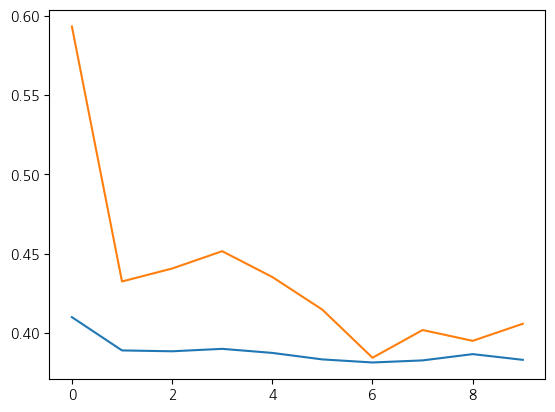

In [37]:
ax = plt.subplots(1, 1)
ax = sns.lineplot(train_loss_list)
ax = sns.lineplot(valid_loss_list)

In [39]:
def csi_score_class(pred, actual):
    matrix = {i:{j:0 for j in range(1, 4+1)}for i in range(1, 4+1)}
    df_matrix = pd.DataFrame(matrix)
    # 길이가 같지 않으면 추론이 제대로 되지 않은 것이므로 에러 발생
    if len(pred) != len(actual):
        raise
    
    # 리스트로 들어온 pred와 actual을 순회하며 해당 class의 개수를 샘
    # 행이 pred, 열이 actual
    for i in range(len(pred)):
        df_matrix[pred[i]][actual[i]] += 1
    
    # H, F, M 배분
    H = df_matrix[1][1] + df_matrix[2][2] + df_matrix[3][3]
    F = sum(df_matrix.iloc[:, :3]) - H
    M = sum(df_matrix.iloc[:3, -1])
    
    return H / (H + F + M), df_matrix, (H, F, M)

In [41]:
epoch_data_list[-1].value_counts()

actual  pred
4       4       1043228
2       4          3081
3       4          3018
1       4          1873
Name: count, dtype: int64

In [55]:
score_list = []
for df in tqdm(epoch_data_list):
    score, _, _ = csi_score_class(df.reset_index(drop=True)["pred"], df.reset_index(drop=True)["actual"])
    score_list.append(score)

  0%|          | 0/2 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [87]:
score_list[1]

0.0

In [40]:
score, csi_df, _ = csi_score_class(epoch_data_list[-1].reset_index(drop=True)["pred"], epoch_data_list[-1].reset_index(drop=True)["actual"])

In [42]:
score

0.0

In [43]:
csi_df

,1,2,3,4
1,0,0,0,1873
2,0,0,0,3081
3,0,0,0,3018
4,0,0,0,1043228


In [42]:
# torch.save(model, "VanillaLSTM.pt")

In [203]:
# # 커널 재실행 시 모델 불러오기
# import torch

# model = torch.load("VanillaLSTM.pt")


In [218]:
# Validation 검증
from tqdm.auto import tqdm

model.eval()
with torch.no_grad():
    valid = []
    valid_label = []
    running_loss = 0.0
    n = len(valid_data_loader)
    valid_iterator = tqdm(enumerate(valid_data_loader), total=n, desc=f"validation")
    for _, batch_data in valid_iterator:
        X, y = batch_data
        y = y.long() - 1
        valid_pred = model(X)
        loss = criterion(valid_pred, y) # output과 y 데이터로 loss 구하기
        valid.append(np.array(valid_pred))
        valid_label.append(torch.argmax(valid_pred, dim=1) + 1)
        running_loss += loss.item() # 한 배치의 loss 더하기 (추후 평균 loss를 구하기 위함)
        train_iterator.set_postfix({
            'valid_loss' : format(loss, 'f')
        })
    valid = np.array(valid).reshape(-1, 4).squeeze()
    valid_label = np.array(valid_label).flatten()
    y_valid = train.query("년도=='K'")["시정구간"].reset_index(drop=True)
    
    valid_df = pd.DataFrame({"actual" : y_valid,
                             "pred" : valid_label})
    
    # loss
    loss_list.append(running_loss / n) # 평균 loss

validation:   0%|          | 0/7300 [00:00<?, ?it/s]

In [225]:
score, csi_df, _ = csi_score_class(valid_df["pred"], valid_df["actual"])

In [226]:
score

0.0

In [227]:
# 행 index가 정답, 열 index가 예측
csi_df

,1,2,3,4
1,0,0,0,1917
2,0,0,0,3212
3,0,0,0,2994
4,0,0,0,1043077


<Axes: ylabel='loss'>

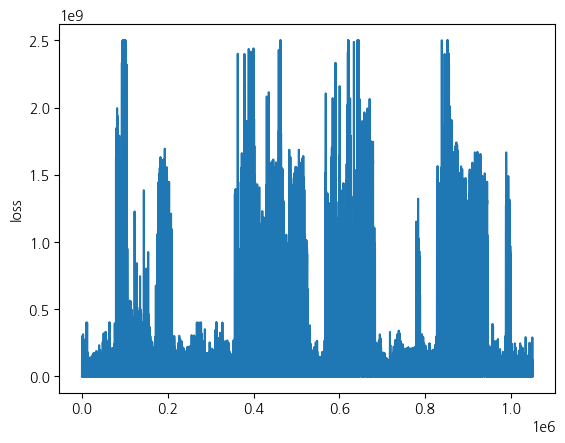

In [56]:
sns.lineplot(valid_df["loss"].astype(float))

In [204]:
# test 셋 forecasting

## window 만큼 imputate로 채우기

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=6)
impute_train = train_df.iloc[:, 1:-1]
imputer.fit(impute_train)

KNNImputer(n_neighbors=6)

In [205]:
target_data = test_df.shift(window_size)[:144]
cols = target_data.columns

In [206]:
pre_test_data = pd.DataFrame(imputer.transform(target_data), columns=cols)[:6]

In [207]:
def is_rain(rain):
    if rain >= 0.5 :
        return 1
    elif rain < 0.5:
        return 0
    else:
        return np.nan

In [208]:
pre_test_data["강수유무"] = pre_test_data["강수유무"].apply(is_rain)

In [209]:
pre_test_data

,10분평균풍향,10분평균풍속,10분평균기온,10분평균상대습도,10분일사량합,10분평균지면온도,강수유무
0,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
1,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
2,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
3,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
4,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
5,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0


In [210]:
test_data = pd.concat([pre_test_data, test_df], axis=0)

In [211]:
test_data

,10분평균풍향,10분평균풍속,10분평균기온,10분평균상대습도,10분일사량합,10분평균지면온도,강수유무
0,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
1,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
2,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
3,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
4,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
...,...,...,...,...,...,...,...
262795,0.941111,0.271111,0.463768,0.713000,0.000000,0.090667,0
262796,0.931111,0.257778,0.465378,0.714000,0.000000,0.090667,0
262797,0.936389,0.235556,0.463768,0.721000,0.000000,0.089333,0
262798,0.894444,0.164444,0.460548,0.725000,0.000000,0.084000,0


In [231]:
test_dataset = CustomDataset(data=test_data, window_size=6, kind='test')
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [232]:
for X in test_data_loader:
    print(X)
    break

tensor([[[0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000]],

        [[0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.9153, 0.0267, 0.3510,  ..., 0.0000, 0.0440, 0.0000]],

        [[0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0

In [233]:
# test forecast
from tqdm.auto import tqdm

model.eval()
with torch.no_grad():
    n = len(test_data_loader)
    test_list = []
    test_iterator = tqdm(enumerate(test_data_loader), total=n, desc=f"Test")
    for _, X in test_iterator:
        test_pred = model(X)
        test_list += np.array(test_pred).flatten().tolist()
    # inverse
    pred_inverse = y_scaler.inverse_transform(np.array(test_list).reshape(-1, 1)).squeeze()
    
    test_pred_df = pd.DataFrame({"pred" : pred_inverse})

Test:   0%|          | 0/1825 [00:00<?, ?it/s]

In [234]:
test_pred_df.isna().sum()

pred    0
dtype: int64

In [235]:
test_pred_df.describe()

,pred
count,262800.000000
mean,15192.797320
std,3712.470791
min,1.000000
25%,13361.749454
50%,15625.940477
75%,18065.948535
max,23079.820463


In [236]:
test_pred_df

,pred
0,16982.521736
1,16289.599942
2,15359.792707
3,14549.874805
4,14054.095399
...,...
262795,17125.795860
262796,17186.622111
262797,17105.705628
262798,17024.614180


In [237]:
test

,년도,월,일,시간,분,지점번호,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,시정구간,ground,alpha,dew_point
0,L,1.0,1.0,0.0,0.0,AI,329.5,0.6,-2.5,0,87.5,0.0,-1.6,4.0,A,-0.317099,-4.285774
1,L,1.0,1.0,0.0,10.0,AI,321.8,1.2,-2.5,0,88.2,0.0,-1.6,4.0,A,-0.309130,-4.179973
2,L,1.0,1.0,0.0,20.0,AI,0.4,0.4,-2.5,0,88.6,0.0,-1.7,4.0,A,-0.304606,-4.119849
3,L,1.0,1.0,0.0,30.0,AI,323.6,0.7,-2.6,0,88.7,0.0,-1.6,4.0,A,-0.310901,-4.203496
4,L,1.0,1.0,0.0,40.0,AI,208.4,0.2,-2.6,0,89.0,0.0,-1.6,4.0,A,-0.307525,-4.158644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262795,L,12.0,31.0,23.0,10.0,ED,338.8,6.1,4.5,0,71.3,0.0,1.9,NaN,E,-0.017403,-0.239285
262796,L,12.0,31.0,23.0,20.0,ED,335.2,5.8,4.6,0,71.4,0.0,1.9,NaN,E,-0.009006,-0.123892
262797,L,12.0,31.0,23.0,30.0,ED,337.1,5.3,4.5,0,72.1,0.0,1.8,NaN,E,-0.006245,-0.085923
262798,L,12.0,31.0,23.0,40.0,ED,322.0,3.7,4.3,0,72.5,0.0,1.4,NaN,E,-0.014720,-0.202430


In [238]:
def make_class(vis):
    if 0 <= vis and vis < 200 :
        return 1
    elif 200 <= vis and vis < 500 :
        return 2
    elif 500 <= vis and vis < 1000 :
        return 3
    elif 1000 <= vis :
        return 4
    else :
        return np.nan

In [239]:
test["시정구간"] = test_pred_df["pred"].apply(make_class)

In [240]:
test[test["시정구간"].isna()]

,년도,월,일,시간,분,지점번호,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,시정구간,ground,alpha,dew_point


In [242]:
test["시정구간"].value_counts()

시정구간
4    260225
1      2222
3       228
2       125
Name: count, dtype: int64

In [243]:
original_test = pd.read_csv(DATA / "fog_test.csv")

In [244]:
original_test
del original_test["Unnamed: 0"]

In [245]:
original_test

,fog_test.year,fog_test.month,fog_test.day,fog_test.time,fog_test.minute,fog_test.stn_id,fog_test.ws10_deg,fog_test.ws10_ms,fog_test.ta,fog_test.re,fog_test.hm,fog_test.sun10,fog_test.ts,fog_test.class
0,L,1,1,0,0,AI,329.5,0.6,-2.5,0.0,87.5,0.0,-1.6,NaN
1,L,1,1,0,10,AI,321.8,1.2,-2.5,0.0,88.2,0.0,-1.6,NaN
2,L,1,1,0,20,AI,0.4,0.4,-2.5,0.0,88.6,0.0,-1.7,NaN
3,L,1,1,0,30,AI,323.6,0.7,-2.6,0.0,88.7,0.0,-1.6,NaN
4,L,1,1,0,40,AI,208.4,0.2,-2.6,0.0,89.0,0.0,-1.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262795,L,12,31,23,10,ED,338.8,6.1,4.5,0.0,71.3,0.0,1.9,NaN
262796,L,12,31,23,20,ED,335.2,5.8,4.6,0.0,71.4,0.0,1.9,NaN
262797,L,12,31,23,30,ED,337.1,5.3,4.5,0.0,72.1,0.0,1.8,NaN
262798,L,12,31,23,40,ED,322.0,3.7,4.3,0.0,72.5,0.0,1.4,NaN


In [250]:
test = test.iloc[:, :-3]

In [251]:
test.columns = original_test.columns

In [252]:
test

,fog_test.year,fog_test.month,fog_test.day,fog_test.time,fog_test.minute,fog_test.stn_id,fog_test.ws10_deg,fog_test.ws10_ms,fog_test.ta,fog_test.re,fog_test.hm,fog_test.sun10,fog_test.ts,fog_test.class
0,L,1.0,1.0,0.0,0.0,AI,329.5,0.6,-2.5,0,87.5,0.0,-1.6,4
1,L,1.0,1.0,0.0,10.0,AI,321.8,1.2,-2.5,0,88.2,0.0,-1.6,4
2,L,1.0,1.0,0.0,20.0,AI,0.4,0.4,-2.5,0,88.6,0.0,-1.7,4
3,L,1.0,1.0,0.0,30.0,AI,323.6,0.7,-2.6,0,88.7,0.0,-1.6,4
4,L,1.0,1.0,0.0,40.0,AI,208.4,0.2,-2.6,0,89.0,0.0,-1.6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262795,L,12.0,31.0,23.0,10.0,ED,338.8,6.1,4.5,0,71.3,0.0,1.9,4
262796,L,12.0,31.0,23.0,20.0,ED,335.2,5.8,4.6,0,71.4,0.0,1.9,4
262797,L,12.0,31.0,23.0,30.0,ED,337.1,5.3,4.5,0,72.1,0.0,1.8,4
262798,L,12.0,31.0,23.0,40.0,ED,322.0,3.7,4.3,0,72.5,0.0,1.4,4


In [253]:
test.to_csv("240253.csv", index=False)